In [191]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [192]:
#importing the dataset and seperating x and y training and test values
df1 = pd.read_csv('mnist_train.csv')
n_samples = int(60000)
Y_train = np.array(df1.iloc[:n_samples,0]).T
X_train = np.array(df1.iloc[:n_samples,1:].T/255)
df2 = pd.read_csv('mnist_test.csv')
Y_test = np.array(df2.iloc[:10000,0]).T
X_test = np.array(df2.iloc[:10000,1:].T/255)

In [193]:
# Check the shapes of training sets
print("X_train: ",X_train.shape)
print("Y_train: ",Y_test.shape)
print(Y_train[0])

X_train:  (784, 60000)
Y_train:  (100,)
5


In [194]:
## We want answer as a probability so we will have to convert the input labels 'Y'
## into probabilities i.e. '1' for that digit and '0' for the rest.
def transform(y):
    temp = np.zeros((y.size,10))
    temp[np.arange(y.size),y] = 1
    temp = temp.T
    return temp
Y_test_prob = transform(Y_test)
Y_train_prob = transform(Y_train)
print(Y_train[:5])
print(Y_train_prob[:,:5].T)

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [215]:
def initialize_parameters():
    W1 = np.random.randn(256,784)
    W2 = np.random.randn(10,256)
    b1 = np.zeros((256,1))
    b2 = np.zeros((10,1))
    return W1,W2,b1,b2

In [196]:
# Define all the activation functions which return activation values.
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def relu(x):
    return np.maximum(0,x)
#     return np.maximum(x*1e-3,x),x
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x) + np.exp(-x))

def softmax(x):
    return np.exp(x)/(np.sum(np.exp(x),axis = 0, keepdims = True))

def probability(x):
    return x/(np.sum(x,axis = 1,keepdims = True))

In [209]:
def forward_prop(X,W1,b1,W2,b2):
    Z1 = np.dot(W1,X) + b1 #(128,784)*(784, 10000) = (128,10000)
    Z1 = Z1/100
    A1 = relu(Z1) #(128,10000)
    Z2 = np.dot(W2,A1) + b2 #(10,128)*(128,10000) = (10,10000)
#     A2 = sigmoid(Z2) #(10,10000)
    A2 = softmax(Z2)
    return A1,A2,Z1

In [210]:
def backward_prop(A2,Y,A1,W2,X,Z1):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2,A1.T)/m #(10,128)
    db2 = np.sum(dZ2,axis = 1,keepdims = True)/m #(10,1)
    g_z = Z1 > 0    #for ReLU activation function
#     g_z = Z1*(1-Z1)
    dZ1 = np.multiply(np.dot(W2.T,dZ2),g_z)
    dW1 = np.dot(dZ1,X.T)/m # (128,784)
    db1 = np.sum(dZ1,1,keepdims = True)/m #(128,1)
    return dW1,dW2,db1,db2,dZ2,dZ1,g_z

In [211]:
def compute_accuracy(AL,Y):
    count = int(0)
    m = Y.shape[0]
    for i in range(m):
        if np.argmax(AL[:,i]) == Y[i]:
            count +=1
    # -np.average(y*np.log(p) + (1-y)*np.log(1-p))
#     np.squeeze(cost) ## Transforms single dimensional value matrix to simple values
    return count/m

In [212]:
def compute_cost(AL,Y):
    m = Y.shape[0]
    cost = -1*np.sum(np.multiply(np.log(AL),Y) + np.multiply(np.log(1-AL),1-Y))/m
    # -np.average(y*np.log(p) + (1-y)*np.log(1-p))
    np.squeeze(cost) ## Remove single dimensional values
    return cost

In [213]:
def predict(X,W1,b1,W2,b2):
    a,prob,c = forward_prop(X,W1,b1,W2,b2)
    return np.argmax(prob,0)  ## If we pass one example only then it will give error

In [214]:
epochs = int(200)
lr = float(0.1)
W1,W2,b1,b2 = initialize_parameters()
accuracy = int(0)
for i in range(epochs):
    A1,A2,Z1 = forward_prop(X_train,W1,b1,W2,b2)
    dW1,dW2,db1,db2,dZ2,dZ1,g_z = backward_prop(A2,Y_train_prob,A1,W2,X_train,Z1)
    W1 = W1 - lr*dW1
    W2 = W2 - lr*dW2
    b1 = b1 - lr*db1
    b2 = b2 - lr*db2
    if i%(epochs/10) == 0:
        print(f"epoch: {i} accuracy: {compute_accuracy(A2,Y_train)}")
#         print()
#         print(db2)  Cost:{compute_cost(A2,Y_train)}
#         print(f"epoch: {i+1} g_z: {g_z} dW1: {dW1} dZ1:{dZ1} ") #b1: {b1} b2: {b2} dW2: {dW2} db1:{db1} db2: {db2} W1: {W1} W2: {W2}
#         print(f"Z1: {Z1} A1: {A1} A2:{A2}")
    
print("done")    

epoch: 0 accuracy: 0.09871666666666666
epoch: 50 accuracy: 0.7777666666666667
epoch: 100 accuracy: 0.8145
epoch: 150 accuracy: 0.8313166666666667
epoch: 200 accuracy: 0.8422
epoch: 250 accuracy: 0.85005
epoch: 300 accuracy: 0.85655
epoch: 350 accuracy: 0.8612
epoch: 400 accuracy: 0.8653833333333333
epoch: 450 accuracy: 0.8687333333333334
done


In [219]:
# Calculate accuracy on test set
_,A_test,_ = forward_prop(X_test,W1,b1,W2,b2)
print(compute_accuracy(A_test,Y_test))

0.89


In [217]:
ans = predict(X_test[:,:15],W1,b1,W2,b2)
# np.argmax(ans)
ans

# print(A2[:,:5])
# np.argmax(A2,0)

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1], dtype=int64)

In [204]:
Tm = np.array([[1,2,3,4],
              [1,2,3,4],
              [1,2,3,4],
              [1,2,3,4]])
Ts = np.array([3,0,2,3])
print(np.sum(Tm,0))

[ 4  8 12 16]


[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]


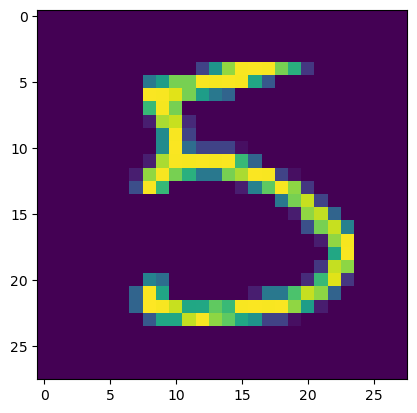

In [218]:
print(Y_test[:15])
plt.imshow(X_test[:,15].reshape(28,28))

In [206]:
np.argmax(softmax(Y_test_prob[:,0]))

7